In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Step 2: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [3]:
# link the drive path

dataset_dir = '/content/drive/MyDrive/Colab Notebooks/DL-Assignment'

In [4]:
# Step 4: Image data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% for validation
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # DenseNet121 input size
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Training subset
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Validation subset
)

Found 12813 images belonging to 10 classes.
Found 3198 images belonging to 10 classes.


In [5]:
# Step 5: Load pre-trained DenseNet121 model without the top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [6]:
# Step 6: Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)  # Adjust number of classes automatically

model = Model(inputs=base_model.input, outputs=x)

In [7]:
# Step 7: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Step 8: Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # You can increase this if needed
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 5059s 12s/step - accuracy: 0.7972 - loss: 1.3209 - val_accuracy: 0.8968 - val_loss: 0.3902
Epoch 2/10
  1/400 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.9375 - loss: 0.2218

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9375 - loss: 0.2218 - val_accuracy: 0.9333 - val_loss: 0.3074
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 53s 130ms/step - accuracy: 0.9865 - loss: 0.0413 - val_accuracy: 0.9785 - val_loss: 0.0807
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 140us/step - accuracy: 0.9688 - loss: 0.0851 - val_accuracy: 0.9667 - val_loss: 0.1115
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 52s 128ms/step - accuracy: 0.9863 - loss: 0.0445 - val_accuracy: 0.9811 - val_loss: 0.0661
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 138us/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 52s 128ms/step - accuracy: 0.9871 - loss: 0.0418 - val_accuracy: 0.9561 - val_loss: 0.1676
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 140us/step - accuracy: 0.8125 - loss: 0.5742 - val_accuracy: 1.0000 - val_loss: 0.0117
Epoch 9/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 53s 129ms/step - accuracy: 0.9912 - loss: 0.0301 - val_acc

In [9]:
# Step 9: Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9961 - loss: 0.0160
Validation Accuracy: 99.47%


In [10]:
# Step 10: Save the model
model.save('/content/drive/MyDrive/tomato_classification_densenet_model.h5')

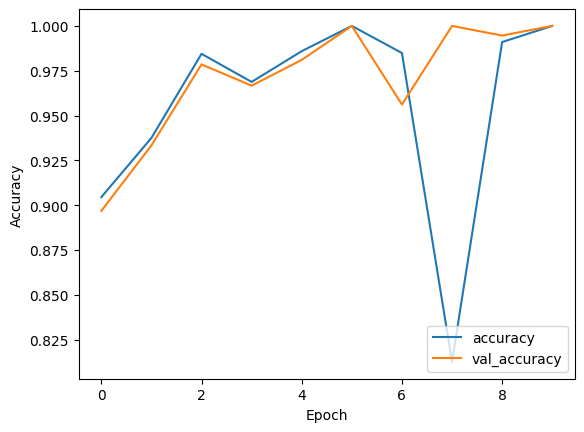

In [11]:
# Step 11: Plot accuracy and loss over time
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()